# Лабораторная работа №2: Классические методы математической статистики

---


Выполнил студент гр. 1384 Шаганов Вячеслав. Вариант №21

## Цель работы

Научится применять методы математической статистики для визуализации и анализа полученных данных; сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Постановка задачи

Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения

#### Выборочные числовые характеристики:

- Мат.ожидание $\overline{X}=\frac{1}{n}\sum_{i=1}^{n}X_i$
- Дисперсия $S^{2}=\frac{1}{n}\sum_{i=1}^{n}\left( X_i-\overline{X} \right)^{2}=\overline{X^{2}}-\overline{X}^{2}$
- Коэф. асимметрии $\widehat{Skew}X=\frac{\left(\frac{1}{n}\sum_{i=1}^{n}\left( X_i-\overline{X} \right)^{3} \right)}{S^{3}}$
- Коэф. эксцесса $\widehat{Kurt}X=\frac{\frac{1}{n}\sum_{i=1}^{n}\left( X_i-\overline{X}^{4} \right)}{S^{4}}-3$

#### Асимптотический доверительный интервал

- На базе Асимптотической нормальности оценки $\widehat{\theta}$

  - Асимптотическая нормальность $\sqrt{n}\left( \widehat{\theta}-\theta \right) \sim \mathcal{N}\left(0,\sigma^{2}(\theta)\right)$
  - Тогда $\sqrt{n}\frac{\widehat{\theta}-\theta}{\sigma\left(\widehat{\theta}\right)} \sim \mathcal{N}\left(0, 1\right)$   
  - Выбираем $x_{\alpha}: \Phi(x_{\alpha})=1-\frac{\alpha}{2}$
  - Асимптотический доверительный интервал  $\left[ \widehat{\theta}-\frac{x_{\alpha} \sigma\left( \widehat{\theta} \right)}{\sqrt{n}}; \widehat{\theta}+\frac{x_{\alpha} \sigma\left( \widehat{\theta} \right)}{\sqrt{n}}\right]$

- На базе ОМП. Пусть $\widehat{\theta}$-ОМ

  - При выполнении условий регулярности: $\sqrt{n}\left( \widehat{\theta}-\theta)\right)\sim \mathcal{N}\left(0,\frac{1}{I(\theta)}\right), I(\theta)=-\mathbb{E}  \frac{\partial^{2} LL}{\partial \theta^{2}}$ - информация Фишера
  - Тогда $\sqrt{n I\left( \widehat{\theta} \right)} \left( \widehat{\theta}-\theta \right)\sim \mathcal{N}(0,1)$
  - Выбираем $x_{\alpha}: \Phi(x_{\alpha})=1-\frac{\alpha}{2}$
  - Асимптотический доверительный интервал  $\left[ \widehat{\theta}-\frac{x_{\alpha}}{\sqrt{n I\left( \widehat{\theta} \right)}};\widehat{\theta}+\frac{x_{\alpha}}{\sqrt{n I\left( \widehat{\theta} \right)}} \right]$

#### Критерий $\chi^2$ для проверки гипотез

- Разобъем множество значений случайной величины X на $N$ интервалов $I_{1}, ..., I_n$
- Обозначим через $p_i$ теоретическую вероятность попадания случайной величины X в интервал $I_i$, при условии, что справедлива $H_{0}$
- $p_i = P(x \in I_i | H_{0})$
- Через $\nu_i$ обозначим число наблюдений нашей выборки, попавших в соответветствующий интервал $I_i$
- $\nu_i = \# \{x_{j} \in I_i\}$
- $X^{2} = \sum \limits_{i=1}^{N} \frac{(\nu_i - p_i n)^{2}}{n p_i} \sim \chi^{2}_{N-1}$

#### Теорема Колмогоров

- $D_n = \overset{}{\underset{X \in \mathbb R}{sup}} |F_{0}(X_i) - F_n(X_i)|$
- $P(\sqrt{n} D_n < z) \xrightarrow[n \rightarrow \infty]{} K(z)$, где $K(z)$ - ф-я распределения Колмогорова

#### Наиболее мощный критерий простой гипотезы

- Для основной гипотезы $H_{0}: \theta=\theta_{0}$ и альтернативной гипотезы $H_{1}: \theta=\theta_{1}$, определим $LR(\overrightarrow{X},\theta_{1},\theta_{0})=\frac{L(\overrightarrow{X},\theta_{1})}{L(\overrightarrow{X},\theta_{0})} $

- Наиболее мощный критерий

  - $\phi(\overrightarrow X) = \begin{cases}
  0, LR(\overrightarrow{X},\theta_{1},\theta_{0}) < C \\
  p, LR(\overrightarrow{X},\theta_{1},\theta_{0}) = C \\
  1, LR(\overrightarrow{X},\theta_{1},\theta_{0}) > C
\end{cases} $


## Выполнение работы

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as чё
import scipy.special as чё_специально

### Задание 1

Таблица 1 $\alpha_1 = 0.01; a = 0.00; b = 0.67; \lambda_0 = 1.50; \lambda_1 = 0.50.$

1 0 0 5 3 0 0 0 1 2 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 4 0 0 0 0 0 0 1 0 0 0 0 0 0
1 0 0


In [3]:
a_1 = 0.01
a = 0.00
b = 0.67
lmbd_0 = 1.5
lmbd_1 = 0.5

X = '1 0 0 5 3 0 0 0 1 2 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 4 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0'.split()
X = [int(x) for x in X]

n = len(X)

#### Пункт a) 
Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот

Построим вариационный ряд

In [4]:
X_var = sorted(X)
print(X_var)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 5]


Построим вариационную функцию распределения

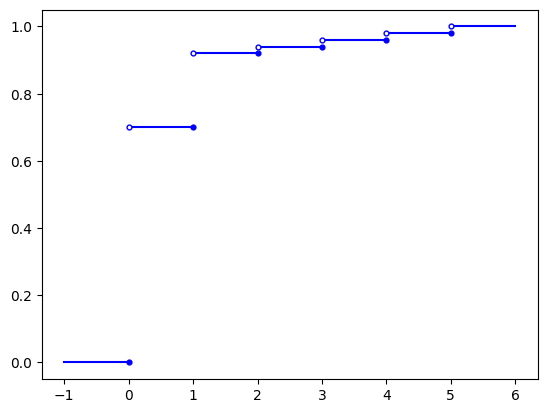

In [5]:
def build_F_selective(X_var):
    vals = set(X_var)
    def F(x):
        cnt = 0
        for val in vals:
            if x > val:
                cnt += X_var.count(val)
            
        return cnt / len(X_var)
    return F
def draw_F_selective(F, X_vals, *, marker_size=12, plus_width=1):
    X_vals = sorted(X_vals)
    X_vals.insert(0, X_vals[0]-plus_width)
    X_vals.append(X_vals[-1]+plus_width)
    Fs = [F(x) for x in X_vals]

    for i in range(1,len(Fs)):
        plt.plot([X_vals[i-1], X_vals[i]], [Fs[i], Fs[i]],c='b', zorder=-1)
        if i != len(Fs)-1:
            plt.scatter(X_vals[i], Fs[i], c='b', s=marker_size)
        if i != 1:
            plt.scatter(X_vals[i-1], Fs[i], s=marker_size, c='white', edgecolors='blue', linewidths=1)
    plt.show()

draw_F_selective(build_F_selective(X_var), list(set(X_var)))

И гистограмму

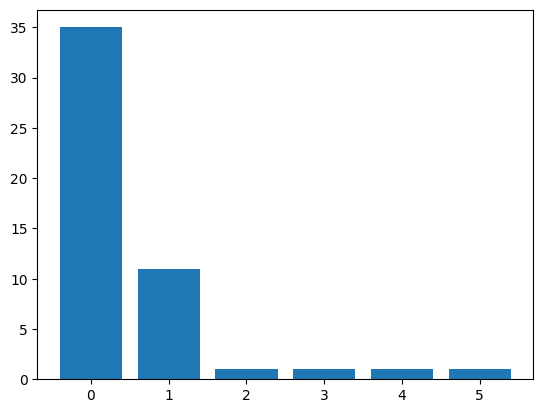

In [6]:
def draw_hist(X, step=None, *, rwidth=0.8, align='left'):
    if step is None:
        bins = len(set(X))
        labels = sorted(set(X))
    else:
        bins = int(np.ceil((max(X)-min(X)) / step))
        labels = [round(min(X) + step*i,3) for i in range(bins)]

    cnts, mids, _ = plt.hist(X, bins, align=align, rwidth=rwidth)
    
    plt.xticks(mids[:-1], labels)
    plt.show()
draw_hist(X)

#### Пункт b) 
Вычислить выборочные аналоги следующих числовых характеристик: 
(i) математического ожидания; (ii) дисперсии; (iii) СКО; (iv) медианы; (v) асимметрии;
(vi) эксцесса; (vii) вероятности P(X $\in$ [a, b]).

In [7]:
X = np.array(X, dtype=float)

In [8]:
def statistics(X):
    mean = X.mean()
    s2 = ((X-mean)**2).mean()
    s = np.sqrt(s2)
    return {
        'mean': mean,
        's2': s2,
        's': s,
        'skew': ((X-mean)**3).mean() / s**3,
        'kurt': ((X-mean)**4).mean() / s2**2 - 3
    }

In [9]:
statistics(X)

{'mean': 0.5,
 's2': 1.05,
 's': 1.02469507659596,
 'skew': 2.7882859227100942,
 'kurt': 8.013605442176871}

In [10]:
def P_discrete(a,b, F):
    if round(b) == b:
        b += 0.01
    return F(b) - F(a)
P_discrete(0, 5, build_F_selective(X_var))

1.0

#### Пункт c)
В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку
максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок

Найдём ОМП.

$q(x) = \frac{\exp(-\lambda)\lambda^x}{x!}$

$L(X, \lambda) = \prod_{i=1}^{n}{q(x_i)} = \exp(-n\lambda) \lambda^{\sum_{i=1}^n{x_i}} \prod_{i=1}^{n}{(x_i!)^{-1}}$

$LL(X, \lambda) = -n\lambda + \sum_{i=1}^n{x_i} \ln\lambda + \ln(\prod_{i=1}^{n}{(x_i!)^{-1}}) $

Дифференцируя по $\lambda$ и приравнивая к нулю, получаем:

$-n + \frac{\sum_{i=1}^n{x_i}}{\lambda} = 0$

Откуда $\lambda = \bar{x}$

Теперь найдём ОММ.

$\mu_1 = \mathbb{E}{x_1} = \lambda $

$\hat{\mu_1} = \bar{x}$

Откуда $\lambda = \bar{x}$

Оценки совпадают. Смещение нулевое, так как $\mathbb{E}{\overline{x}} = \frac{1}{n}\sum_{i=1}^n\mathbb{E}{x_1}=\lambda$

#### Пункт d)
Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки
максимального правдоподобия

Случайная величина $\sqrt{n} \frac{\bar{x}-\lambda}{s}$ будет сходится по распределению к нормальной стандартной с.в.

Пусть $x_{\alpha_1} = \Phi^{-1}(1 - \frac{\alpha_1}{2})$

$1-\alpha_1 = \Phi(x_{\alpha_1}) - \Phi(-x_{\alpha_1}) \\ \approx \mathbb{P}(-x_{\alpha_1}  \leqslant \sqrt{n} \frac{\bar{x}-\lambda}{s}  \leqslant x_{\alpha_1}) \\ = \mathbb{P}(-\frac{s \cdot x_{\alpha_1}}{\sqrt{n}}  \leqslant \bar{x}-\lambda  \leqslant \frac{s \cdot x_{\alpha_1}}{\sqrt{n}}) \\ = \mathbb{P}(\bar{x}-\frac{s \cdot x_{\alpha_1}}{\sqrt{n}}  \leqslant \lambda  \leqslant \bar{x}+\frac{s \cdot x_{\alpha_1}}{\sqrt{n}})$

Тогда асимптотический доверительный интервал для $\lambda$ будет выглядеть как $\left[\bar{x}-\frac{s \cdot x_{\alpha_1}}{\sqrt{n}}; \bar{x}+\frac{s \cdot x_{\alpha_1}}{\sqrt{n}}\right]$

In [11]:
x_a_1 = чё.norm.ppf(1 - a_1/2)

stats = statistics(X)
mean = stats['mean']
s = stats['s']

left = mean - s * x_a_1 / np.sqrt(n)
right = mean + s * x_a_1 / np.sqrt(n)

print(f'[{left}; {right}]')

[0.12672687128398125; 0.8732731287160187]


#### Пункт e)
Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия
с распределением Пуассона с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_1$. Вычислить
наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу

In [12]:

def build_puas(lmbd):
    def fact(x):
        if x in [0,1]:
            return 1
        pr = 1
        for i in range(2, x+1):
            pr *= i
        return pr
    def p(x):
        return np.exp(-lmbd) * lmbd**x / fact(x)
    
    return p

In [13]:
puas = чё.poisson(lmbd_1) #build_puas(lmbd_0)
p = np.array([puas.cdf(i) - puas.cdf(i-1) for i in range(6)]) # 0..5
p[-1] = 1 - puas.cdf(4)
nu = np.array([(X==i).sum() for i in range(6)], dtype=float)
print(n*p.round(3), nu)

[30.35 15.15  3.8   0.65  0.1   0.  ] [35. 11.  1.  1.  1.  1.]


Теперь зададим значение статистики $x^2$, что должна сходиться по распределению к хи-квадрату с 5 степенями свободы (т.к. всего 6 возможных значений) 

In [14]:
x_sq = ( ((nu - n*p)**2) / (n*p) ).sum()

Определим критерий

In [15]:
from scipy.stats.distributions import chi2
def build_criteria(alpha, df):
    x_a = chi2.ppf(1 - alpha, df=df)
    return lambda x_sq: 0 if x_sq <= x_a else 1

Теперь вычислим значение критерия для полученной статистики

In [16]:
phi = build_criteria(a_1, len(set(X))-1)
phi(x_sq)

1

Критерий равен 1, что указывает на то, что стоит отказаться от основной гипотезы.

Теперь найдём наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу, при помощи бинарного поиска (в силу того, что функция распределения хи-квадрата возрастающая функция).

In [17]:
l = 0
r = 1
eps = 1e-15
while r - l > eps:
    mid = (r+l)/2
    if build_criteria(mid, len(set(X))-1)(x_sq):
        r = mid
    else:
        l = mid

print("Максимальное значение уровня занчимости, про котором нет оснований отвергнуть основную гипотезу:",l)
     

Максимальное значение уровня занчимости, про котором нет оснований отвергнуть основную гипотезу: 0


#### Пункт f)
Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить
гипотезу на уровне значимости $\alpha_1$. Вычислить наибольшее значение уровня значимости, на котором ещё нет
оснований отвергнуть данную гипотезу.

ОМП для параметра было найдено ранее - выборочное мат. ожидание.

In [18]:
k = 1
puas = build_puas(mean)
p = np.array([puas(i) for i in range(6)])

In [19]:
x_sq = ((nu - n*p)**2 / (n*p)).sum()

In [20]:
build_criteria(mid, len(set(X))-k-1)(x_sq)

1

Теперь найдём наибольшее значение уровня значимости, на котором ещё нет
оснований отвергнуть данную гипотезу.

Гипотеза не отвергается при $x^2 \leqslant \Kappa_{r-1}^{-1}(1-\alpha)$, откуда можно получить неравенство на $\alpha$: $\alpha \leqslant 1-\Kappa_{r-1}(x^2)$


In [21]:
max_a = 1 - chi2.cdf(x_sq, df=len(set(X))-k-1)
max_a

0.0

#### Пункт g)
Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda = \lambda_0$ при
альтернативе пуассоновости с параметром $\lambda = \lambda_1$. Проверить гипотезу на уровне значимости $\alpha_1$. Что получится,
если поменять местами основную и альтернативную гипотезы?

$L(X, \lambda) = \exp(-n\lambda) \lambda^{\sum_{i=1}^n{x_i}} \prod_{i=1}^{n}{(x_i!)^{-1}}$

$LR(X, \lambda_1, \lambda_0) = \frac{\lambda_1^{\sum_{i=1}^n{x_i}} e^{-\lambda_1 n}}{\lambda_0^{\sum_{i=1}^n{x_i}} e^{-\lambda_0 n}} = \left(\frac{\lambda_1}{\lambda_0}\right)^{\sum_{i=1}^n{x_i}} e^{(\lambda_0 - \lambda_1)n}$

$\left(\frac{\lambda_1}{\lambda_0}\right)^{\sum_{i=1}^n{x_i}} e^{(\lambda_0 - \lambda_1)n} > x_\alpha \Leftrightarrow \ln\frac{\lambda_1}{\lambda_0}\sum_{i=1}^n{x_i} + (\lambda_0 - \lambda_1)n > \ln{x_\alpha} \Leftrightarrow \sum_{i=1}^n{x_i} > \frac{\ln{x_\alpha} - (\lambda_0 - \lambda_1)n}{\ln\frac{\lambda_1}{\lambda_0}} = \frac{(\lambda_0 - \lambda_1)n - \ln{x_\alpha}}{\ln\lambda_0 - \ln\lambda_1}$

Пусть $B := \left\lfloor \frac{(\lambda_0 - \lambda_1)n - \ln{x_\alpha}}{\ln\lambda_0 - \ln\lambda_1} \right\rfloor$

Случайная величина $\sum_{i=1}^n{x_i}$ имеет распределение $\mathcal{Pois}(\sum_{i=1}^n{\lambda_i})$, то есть $\mathcal{Pois}(n\lambda)$

$\mathbb{P}_{\lambda_0}\left(LR(X, \lambda_1, \lambda_0) > x_\alpha \right) + p \cdot \mathbb{P}_{\lambda_0}\left(LR(X, \lambda_1, \lambda_0) = x_\alpha \right) = \mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} > B \right) + p\cdot\mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} = B \right) = \alpha$

$\mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} \geq B \right) = 1 - \mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} < B \right) = 1 - \sum_{i=0}^{B-1}{ \frac{(n\lambda_0)^i exp(-n\lambda_0)}{i!} }$

$1 - \sum_{i=0}^{B}{ \frac{(n\lambda_0)^i exp(-n\lambda_0)}{i!}} \leq \alpha \leq 1 - \sum_{i=0}^{B-1}{ \frac{(n\lambda_0)^i exp(-n\lambda_0)}{i!}}$

Отсюда можно найти B

In [22]:
prob = build_puas(n*lmbd_0)

for B in range(1, 100):
    left = 1
    right = 1
    for i in range(0, B):
        left -= prob(i)
        right -= prob(i)
    left -= prob(B)
    if left <= a_1 <= right:
        print(left, right, B)

0.008316905096324425 0.011054848664904731 96


$p$ можно найти по формуле $\frac{\alpha - \mathbb{P}_{\lambda_0}\left(LR(X, \lambda_1, \lambda_0) > x_\alpha \right)}{\mathbb{P}_{\lambda_0}\left(LR(X, \lambda_1, \lambda_0) = x_\alpha \right)} = \frac{\alpha - \mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} > B \right)}{\mathbb{P}_{\lambda_0}\left(\sum_{i=1}^n{x_i} = B \right)}$

In [23]:
B = 96
p = (a_1 - (1 - sum([prob(i) for i in range(0, B+1)]))) / prob(B)
p

0.6147295813507884

Итак, НМ критерий будет выглядеть как 

$\phi(x) = \begin{cases}
    0, \sum_{i=1}^n{x_i} < 96 \\
    0.6147, \sum_{i=1}^n{x_i} = 96 \\
    1, \sum_{i=1}^n{x_i} > 96 
\end{cases} $

In [24]:
def build_most_powerful_criteria(p, B):
    def phi(X):
        if sum(X) == B: return p
        return 1 if sum(X) > B else 0
    return phi

In [25]:
phi = build_most_powerful_criteria(p, B)
phi(X)

0

То есть оснований отвергнуть основную гипотезу нет.

Если заменить основную и альтернативную гипотезу, получим

$B := \left\lfloor \frac{(\lambda_1 - \lambda_0)n - \ln{x_\alpha}}{\ln\lambda_1 - \ln\lambda_0} \right\rfloor = \left\lfloor \frac{(\lambda_0 - \lambda_1)n + \ln{x_\alpha}}{\ln\lambda_0 - \ln\lambda_1} \right\rfloor$

$1 - \sum_{i=0}^{B}{ \frac{(n\lambda_1)^i exp(-n\lambda_0)}{i!}} \leq \alpha \leq 1 - \sum_{i=0}^{B-1}{ \frac{(n\lambda_1)^i exp(-n\lambda_1)}{i!}}$


In [26]:
prob = build_puas(n*lmbd_1)

for B in range(1, 100):
    left = 1
    right = 1
    for i in range(0, B):
        left -= prob(i)
        right -= prob(i)
    left -= prob(B)
    if left <= a_1 <= right:
        print(left, right, B)

0.009210611590257316 0.014552335040101358 37


In [27]:
B = 37
p = (a_1 - (1 - sum([prob(i) for i in range(0, B+1)]))) / prob(B)
p

0.14777785056724888

Итак, получим 

$\phi(x) = \begin{cases}
    0, \sum_{i=1}^n{x_i} < B \\
    0.1478, \sum_{i=1}^n{x_i} = B \\
    1, \sum_{i=1}^n{x_i} > B 
\end{cases} $

In [28]:
phi = build_most_powerful_criteria(p, B)
phi(X)

0

То есть оснований отвергнуть альтернативную гипотезу нет.

---
#### Пункт h)
В пунктах (c)-(f) заменить семейство распределений Пуассона на семейство геометрических распределений:

$\mathbb{P}_\lambda(X=k)=\frac{\lambda^k}{(\lambda+1)^{k+1}}, k \in \mathbb{Z}_+$

##### h.c) 
Найдём ОМП.

$L(X, \lambda) = \lambda^{\sum_{i=1}^n{k_i}} \cdot (\lambda + 1)^{-\sum_{i=1}^n{k_i}-n}$

$LL(X, \lambda) = \sum_{i=1}^n{k_i} \ln\lambda - \left(\sum_{i=1}^n{k_i}+n\right) \ln(\lambda+1)$

Откуда 

$\frac{\sum_{i=1}^n{k_i}}{\lambda} - \frac{\sum_{i=1}^n{k_i} + n}{\lambda+1} = 0$

$\frac{1}{\lambda} = \frac{1+\frac{1}{\overline{k}}}{\lambda+1}$

$\lambda+1 = \lambda + \frac{\lambda}{\overline{k}} => \lambda = \overline{k}$

Найдём ОММ

$\mu_1 = \mathbb{E}k_1 = \sum_{i=1}^n{\lambda\cdot\frac{\lambda^k}{(\lambda+1)^{k+1}}} = \lambda\sum_{i=1}^n{\frac{\lambda^k}{(\lambda+1)^{k+1}}} = \lambda$

$\hat{\mu_1} = \overline{k}$

Откуда $\lambda=\overline{k}$

Смещение нулевое, так как $\mathbb{E}{\overline{k}} = \frac{1}{n}\sum_{i=1}^n\mathbb{E}{k_1}=\lambda$ 

##### h.d)

Случайная величина $\sqrt{n} \frac{\bar{k}-\lambda}{s}$ будет сходится по распределению к нормальной стандартной с.в.

Пусть $k_{\alpha_1} = \Phi^{-1}(1 - \frac{\alpha_1}{2})$

$1-\alpha_1 = \Phi(k_{\alpha_1}) - \Phi(-k_{\alpha_1}) \\ \approx \mathbb{P}(-k_{\alpha_1}  \leqslant \sqrt{n} \frac{\bar{x}-\lambda}{s}  \leqslant k_{\alpha_1}) \\ = \mathbb{P}(-\frac{s \cdot k_{\alpha_1}}{\sqrt{n}}  \leqslant \bar{x}-\lambda  \leqslant \frac{s \cdot k_{\alpha_1}}{\sqrt{n}}) \\ = \mathbb{P}(\bar{x}-\frac{s \cdot k_{\alpha_1}}{\sqrt{n}}  \leqslant \lambda  \leqslant \bar{x}+\frac{s \cdot k_{\alpha_1}}{\sqrt{n}})$

Тогда асимптотический доверительный интервал для $\lambda$ будет выглядеть как $\left[\bar{k}-\frac{s \cdot k_{\alpha_1}}{\sqrt{n}}; \bar{k}+\frac{s \cdot k_{\alpha_1}}{\sqrt{n}}\right]$

In [29]:
x_a_1 = чё.norm.ppf(1 - a_1/2)

stats = statistics(X)
mean = stats['mean']
s = stats['s']

left = mean - s * x_a_1 / np.sqrt(n)
right = mean + s * x_a_1 / np.sqrt(n)

print(f'[{left}; {right}]')

[0.12672687128398125; 0.8732731287160187]


##### Пункт h.e)

In [30]:
def build_geom(lmbd):
    return lambda k: lmbd**k / (lmbd+1)**(k+1)

geom = build_geom(lmbd_0)
p = np.array([geom(i) for i in range(6)]) # 0..5
nu = np.array([(X==i).sum() for i in range(6)], dtype=float)

x_sq = ((nu - n*p)**2 / (n*p)).sum()
phi = build_criteria(a_1, len(set(X))-1)
phi(x_sq)

1

Критерий равен 1, что указывает на то, что вероятность отказа от основной гипотезы равна 1.

Теперь найдём максимальное значение уровня значимости, при котором ещё нет оснований отвергнуть основную гипотезу.

In [31]:
1 - chi2.cdf(x_sq, len(set(X))-1)

0.0010512458926761337

##### h.f) 
Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия. Проверить
гипотезу на уровне значимости $\alpha_1$. Вычислить наибольшее значение уровня значимости, на котором ещё нет
оснований отвергнуть данную гипотезу.

ОМП для параметра было найдено ранее - выборочное мат. ожидание.

In [32]:
k = 1
geom = build_geom(mean)
p = np.array([geom(i) for i in range(6)])
x_sq = ((nu - n*p)**2 / (n*p)).sum()
build_criteria(mid, len(set(X))-k-1)(x_sq)

0

Теперь найдём наибольшее значение уровня значимости, на котором ещё нет
оснований отвергнуть данную гипотезу.

Гипотеза не отвергается при $x^2 \leqslant \Kappa_{r-1}^{-1}(1-\alpha)$, откуда можно получить неравенство на $\alpha$: $\alpha \leqslant 1-\Kappa_{r-1}(x^2)$

In [33]:
max_a = 1 - chi2.cdf(x_sq, df=len(set(X))-k-1)
max_a

0.07888214573498298

### Задание 2

In [34]:
a_2 = 0.20
c = 1.20
d = 2.40
h = 0.80
lmbd_0 = 0.25
lmbd_1 = 0.50

X = '''6.950 0.860 2.882 0.532 1.559 0.945 0.889 2.158 2.181 2.249 6.160 1.511 1.043 5.621 0.033 1.033 5.197 0.011 0.472 0.733 0.251
1.066 3.131 1.421 1.615 1.012 0.210 3.391 0.049 5.410 0.920 1.060 3.010 0.546 3.091 8.724 0.657 4.048 1.504 2.461 0.128 0.671
0.446 0.578 0.003 1.682 4.707 6.054 0.212 1.963'''.split()
X = [float(x) for x in X]
n = len(X)

### Пункт a)
Построить вариационный ряд, эмпирическую функцию распределения, гистограмму и полигон частот с шагом h. 

In [35]:
X_var = sorted(X)
print(X_var)

[0.003, 0.011, 0.033, 0.049, 0.128, 0.21, 0.212, 0.251, 0.446, 0.472, 0.532, 0.546, 0.578, 0.657, 0.671, 0.733, 0.86, 0.889, 0.92, 0.945, 1.012, 1.033, 1.043, 1.06, 1.066, 1.421, 1.504, 1.511, 1.559, 1.615, 1.682, 1.963, 2.158, 2.181, 2.249, 2.461, 2.882, 3.01, 3.091, 3.131, 3.391, 4.048, 4.707, 5.197, 5.41, 5.621, 6.054, 6.16, 6.95, 8.724]


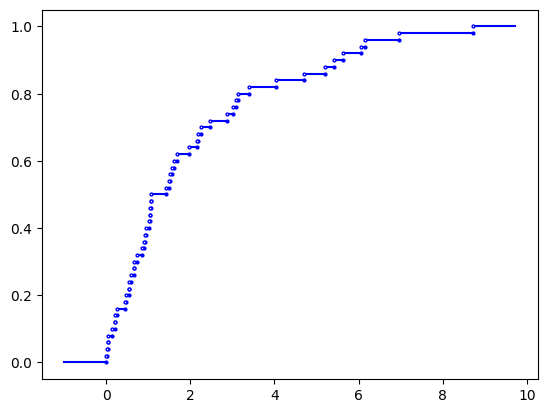

In [36]:
F_sel = build_F_selective(X_var)
draw_F_selective(F_sel, set(X_var), marker_size=4)

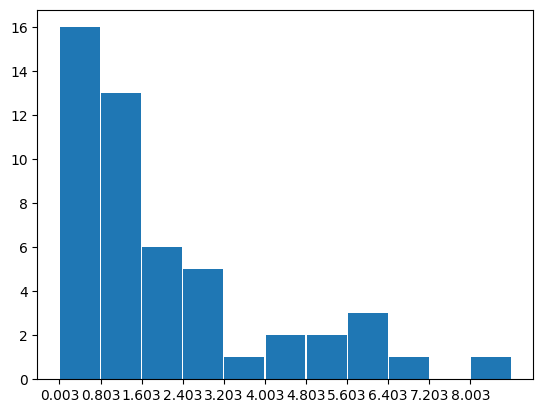

In [37]:
draw_hist(X, h, rwidth=0.97, align='mid')

Нарисуем полигон

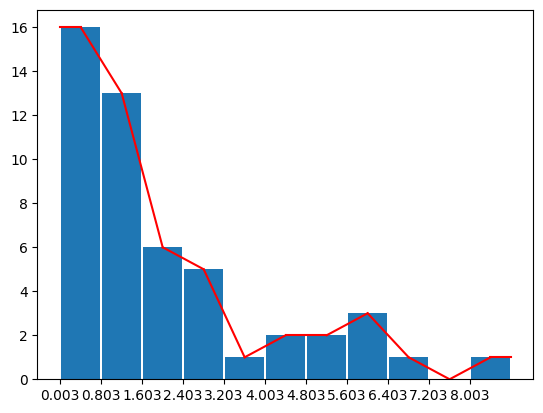

In [38]:
def draw_polygon(X, step):
    bins = int(np.ceil((max(X)-min(X)) / step))
    labels = [round(min(X) + step*i,3) for i in range(bins)]

    cnts, mids, _ = plt.hist(X, bins, align='mid', rwidth=0.97)
    
    plt.xticks(mids[:-1], labels)
    plt.plot([mids[0], mids[0]+step/2], [cnts[0], cnts[0]], c='r')
    for i in range(len(cnts)-1):
        plt.plot([mids[i]+step/2, mids[i+1]+step/2], [cnts[i], cnts[i+1]], c='r')
    plt.plot([mids[-1]-step/2, mids[-1]], [cnts[-1], cnts[-1]], c='r')
    plt.show()
draw_polygon(X, h)

#### Пункт b)
Вычислить выборочный аналоги числовых характеристик (см. 1.b) 

In [39]:
statistics(np.array(X))

{'mean': 2.0608,
 's2': 4.2349954,
 's': 2.0579104450874435,
 'skew': 1.3609086231265537,
 'kurt': 1.1298149107268518}

In [40]:
def P_continuous(c, d, F):
    return F(d) - F(c)
P_continuous(0, 1, F_sel)

0.4

#### Пункт c)
В предположении, что исходные наблюдения являются выборкой из показательного распределения, построить ОМП параметра $\lambda$ и соответствующую оценку по методу моментов. Найти смещение оценок.

$p_\lambda(x) = \
\begin{matrix}
    \begin{cases}
      \lambda e^{-\lambda x}, x \geqslant  0 \\
      0, x < 0
    \end{cases}
\end{matrix}
$

Предполагая, что $\mathbb{P}(\forall i: x_i >= 0) = 1$ можем выписать функцию правдоподобия следующим образом:

$L(X, \lambda) = \lambda^n e^{-\lambda\sum_{i=1}^n{x_i}}$

$LL(X, \lambda) = n\ln\lambda - \lambda\sum_{i=1}^n{x_i}$

Откуда, дифференцируя, получим

$\frac{n}{\lambda} - \sum_{i=1}^n{x_i} = 0 \Rightarrow \lambda = \frac{1}{\overline{x}}$ - ОМП

Теперь найдём ОММ

$\mu = \mathbb{E}x = \int_\mathbb{R_+} x\lambda e^{-\lambda x} \,dx = [t = \lambda x; dt = \lambda dx] = \frac{1}{\lambda}\int_\mathbb{R_+} t e^{-t} \,dx  = \frac{1}{\lambda} \Gamma(2) = \frac{1}{\lambda}$

$\hat\mu = \overline{x}$

Откуда ОММ: $\lambda = \frac{1}{\overline{x}}$

Теперь найдём смещение оценки.

Показательное распределение - частный случай Гамма-распределения, $x_i \thicksim \mathcal{Gamma}\left( 1, \frac{1}{\lambda} \right) \Rightarrow \sum_{i=1}^n{x_i} \thicksim \mathcal{Gamma}\left( n, \frac{1}{\lambda} \right)$.

$\mathbb{E}\frac{n}{\sum_{i=1}^n{x_i}} = n\mathbb{E}\left(\sum_{i=1}^n{x_i} \right)^{-1} = \left[ \alpha = n; \beta = \frac{1}{\lambda}; \gamma = -1 \right] = n\left( \frac{1}{\lambda} \right)^{-1} \frac{Г(n - 1)}{Г(n)} = \lambda\frac{n}{n-1}$

И тогда смещение $b$ равно

$b(\lambda) = \lambda\frac{n}{n-1} - \lambda = \frac{\lambda}{n-1}$

#### Пункт d)
Построить асимптотический доверительный интервал уровня значимости $\alpha_2$ для параметра $\lambda$ на базе оценки
максимального правдоподобия.

$\sqrt{n \bar{I}(\lambda)}(\hat\lambda - \lambda) = \sqrt{n {I_1}(\lambda)}(\hat\lambda - \lambda) \Rightarrow \mathcal{N}(0, 1)$

$I_1(\lambda) = -\mathbb{E}\frac{\partial^2 LL(X; \lambda)}{\partial \lambda^2} = \frac{n}{\lambda^2} = \frac{n}{\overline{x}^2}$ - информация Фишера

Выберем $x_\alpha = \Phi^{-1}(1 - \frac{\alpha}{2})$

Тогда асимптотический доверительный интервал на базе ОМП будет выглядеть следующим образом:

$\left[ \frac{1}{\overline{x}} - \frac{x_\alpha \overline{x}}{\sqrt{n}} ; \frac{1}{\overline{x}} + \frac{x_\alpha \overline{x}}{\sqrt{n}} \right]$

In [41]:
X = np.array(X)
x_a = чё.norm.ppf(1 - a_2/2)
print(f'[{1/X.mean() - x_a * X.mean() / np.sqrt(n)} ; {1/X.mean() + x_a * X.mean() / np.sqrt(n)}]') 

[0.11175160959260794 ; 0.85874528481733]


#### Пункт e)
С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия
с показательным распределением с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить
наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

In [42]:
e = чё.expon(scale=1/lmbd_0)
Dn = max( [F_sel(x) - e.cdf(x) for x in np.linspace(0, X.max(), int(X.max() / 0.001))] )

x_a = чё.kstwobign().ppf(1 - a_2)
phi = lambda Dn: 0 if np.sqrt(n) * Dn <= x_a else 1

print(f"{Dn=} \n{x_a=}")
phi(Dn)

Dn=0.27668672158980956 
x_a=1.072749174939648


1

Критерий равен 1, а значит, гипотеза отвергается. Найдём наибольший уровень значимости, при котором гипотеза не будет отвергаться.

In [43]:
print(
    "Наибольший уровень значимости, при котором нет оснований для отвержения гипотезы:", 
    1 - чё.kstwobign().cdf(np.sqrt(n) * Dn))

Наибольший уровень значимости, при котором нет оснований для отвержения гипотезы: 0.0009468148368193541


#### Пункт f)
Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с
показательным распределением с параметром $\lambda_0$. Проверить гипотезу на уровне $\alpha_2$. Вычислить наибольшее
значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу

Разобьём выборку на интервалы. Выберем $I_1 = (-\infty; 2); I_2 = [2; 4); I_3 = [4; 6); I_4 = [6; 8); I_5 = [8; \infty)$ 

In [44]:
intervals = [ [2*i, 2*i + 2] for i in range(5) ]
intervals[0][0] = -10000
intervals[-1][1] = 10000
intervals

[[-10000, 2], [2, 4], [4, 6], [6, 8], [8, 10000]]

Посчитаем абсолютные частоты:

In [45]:
frequencies = [ ( (intrv[0] <= X) & (X < intrv[1]) ).sum() for intrv in intervals ]
frequencies

[32, 9, 5, 3, 1]

Вычислим теоретические вероятности попадания в интервалы:

In [46]:
p = np.array([ e.cdf(intrv[1]) - e.cdf(intrv[0])  for intrv in intervals ])

Теперь зададим значение статистики $X^2$ и сам критерий

In [47]:
x_sq = ( (frequencies - n*p)**2 / (n*p) ).sum()
phi = build_criteria(a_2, len(intervals) - 1)
phi(x_sq)

1

Критерий равен 1, то есть следует отвергнуть основную гипотезу.

Максимальное значение уровня значимости можно вычислить как $1 - K_{r-1}(X^2)$

In [48]:
1 - чё.chi2.cdf(x_sq, df=len(intervals)-1)

0.005884192778342401

#### Пункт g)
Построить критерий проверки значимости $\chi^2$ сложной гипотезы согласия с показательным распределением.
Проверить гипотезу на уровне $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет
оснований отвергнуть данную гипотезу.

Используем те же интервалы. Распределение однопараметрическое $\Rightarrow d = 1$. ОМП было посчитано ранее: $\hat\lambda = \frac{1}{\bar{x}}$

In [49]:
d = 1

e = чё.expon(scale=X.mean())
p = np.array([ e.cdf(intrv[1]) - e.cdf(intrv[0])  for intrv in intervals ])

x_sq = ( (frequencies - n*p)**2/(n*p) ).sum()
phi = build_criteria(a_2, len(intervals) - d - 1)

phi(x_sq)

0

Критерий равен 0, оснований отвергнуть гипотезу согласия нет.

Найдём максимальное значение уровня значимости, при котором нет оснований отвергнуть гипотезу согласия.

In [50]:
1 - чё.chi2.cdf(x_sq, df=len(intervals)-d-1)

0.6230064333775203

#### Пункт h)
Построить наиболее мощный критерий проверки простой гипотезы о показательности с параметром $\lambda = \lambda_0$
при альтернативе показательности с параметром $\lambda = \lambda_1$. Проверить гипотезу на уровне значимости $\alpha_2$. Что
получится, если поменять местами основную и альтернативную гипотезы?

$L(X, \lambda) = \lambda^n e^{-\lambda\sum_{i=1}^n{x_i}}$

$LR(X, \lambda_1, \lambda_0) = \frac{\lambda_1^n e^{-\lambda_1\sum_{i=1}^n{x_i}}}{\lambda_0^n e^{-\lambda_0\sum_{i=1}^n{x_i}}} = \left(\frac{\lambda_1}{\lambda_0}\right)^n e^{(\lambda_0 - \lambda_1) \sum_{i=1}^n{x_i}}$

$\left(\frac{\lambda_1}{\lambda_0}\right)^n e^{(\lambda_0 - \lambda_1) \sum_{i=1}^n{x_i}} > x_\alpha \
\Leftrightarrow n\ln\frac{\lambda_1}{\lambda_0} + (\lambda_0 - \lambda_1)\sum_{i=1}^n{x_i} > \ln{x_\alpha} \
\Leftrightarrow \sum_{i=1}^n{x_i} > \frac{\ln{x_\alpha} - n\ln\frac{\lambda_1}{\lambda_0}}{(\lambda_0 - \lambda_1)}$

Пусть $B := \frac{\ln{x_\alpha} - n\ln\frac{\lambda_1}{\lambda_0}}{(\lambda_0 - \lambda_1)}$

Далее учитываем то, что $\sum_{i=1}^n{x_i} \thicksim \mathcal{Gamma}\left( n, \frac{1}{\lambda} \right)$

$\mathbb{P}_{\lambda_0}\left(LR(X, \lambda_1, \lambda_0) > x_\alpha \right) + p \cdot \mathbb{P}_{\lambda_0}\left(LR(X, \lambda_1, \lambda_0) = x_\alpha \right) = \mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} > B \right) + p\cdot\mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} = B \right) = \alpha$

$\mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} > B \right) \leq \alpha \leq \mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} \geq B \right)$

$\mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} \geq B \right) = 1 - \mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} < B \right) = 1 - F_{\lambda_0}(B)$

Левая часть неравенства раскрывается точно также в силу непрерывности случайной величины. Из чего заключаем, что $\alpha = 1 - F_{\lambda_0}(B)$

Отсюда можно найти B: $B = F^{-1}_{\lambda_0}(1 - \alpha)$

In [51]:
Gamma = чё.gamma(a=n, scale=1/lmbd_0)
B = Gamma.ppf(1 - a_2)
B

223.33342631658067

$p$ не может быть определена однозначно, так как $\mathbb{P}_{\lambda_0}\left(LR(X, \lambda_1, \lambda_0) = x_\alpha \right) = 0$

Окончательно, наиболее мощный критерий будет выглядеть как

$\phi(x) = \begin{cases}
    0, \sum_{i=1}^n{x_i} < 223.333 \\
    p, \sum_{i=1}^n{x_i} = 223.333 \\
    1, \sum_{i=1}^n{x_i} > 223.333 
\end{cases} $

Поменяв альтернативную и основную гипотезы местами, получим

$\mathbb{P}_{\lambda_1}\left(LR(X, \lambda_0, \lambda_1) > x_\alpha \right) + p \cdot \mathbb{P}_{\lambda_1}\left(LR(X, \lambda_0, \lambda_1) = x_\alpha \right) = \mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} > B \right) + p\cdot\mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} = B \right) = \alpha$

$\mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} > B \right) \leq \alpha \leq \mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} \geq B \right)$

$\mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} \geq B \right) = 1 - \mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} < B \right) = 1 - F_{\lambda_1}(B)$

Заключаем, что $\alpha = 1 - F_{\lambda_1}(B)$

Откуда $B = F^{-1}_{\lambda_1}(1 - \alpha)$

In [52]:
Gamma = чё.gamma(a=n, scale=1/lmbd_1)
B = Gamma.ppf(1 - a_2)
B

111.66671315829034

$p$ также не может быть определена однозначно.

Наиболее мощный критерий в данном случае будет выглядеть как 

$\phi(x) = \begin{cases}
    0, \sum_{i=1}^n{x_i} < 111.666 \\
    p, \sum_{i=1}^n{x_i} = 111.666 \\
    1, \sum_{i=1}^n{x_i} > 111.666 
\end{cases} $

---
#### Пункт i)
В пунктах (c)-(h) заменить семейство показательных распределений на семейство гамма-распределений с
плотностями $p_\lambda(x) = \frac{\sqrt{\lambda} \exp(-\lambda x/2)}{\sqrt{2\pi x}}$
(использовать таблицу распределений $\chi_1^2$).

##### Пункт i.c)
ОМП:

$L(X, \lambda) = \lambda^{\frac{n}{2}} (2\pi)^{-\frac{n}{2}} \exp(-\frac{\lambda}{2} \sum_{i=1}^n{x_i}) \prod^n_{i=1}{x_i^{-\frac{1}{2}}}$

$LL(X, \lambda) = \frac{n}{2} \ln\lambda -\frac{n}{2} \ln(2\pi) -\frac{\lambda}{2} \sum_{i=1}^n{x_i} + \ln\left( \prod^n_{i=1}{x_i^{-\frac{1}{2}}} \right)$

Откуда $\frac{n}{2\lambda} - \frac{1}{2} \sum_{i=1}^n{x_i} = 0 \Rightarrow \hat\lambda = \frac{1}{\bar{x}} $

ОММ: 

$\bar{x} = \mathbb{E}{x} = \int_\mathbb{R_+} x\frac{\sqrt{\lambda} \exp(-\lambda x/2)}{\sqrt{2\pi x}} \,dx = \
\frac{\sqrt{\lambda}}{\sqrt{2\pi}} \int_\mathbb{R_+} \sqrt{x} \exp(-\lambda x/2) \,dx = \
[t = \lambda x/2; \frac{2}{\lambda} dt = dx] = \
\frac{2}{\lambda\sqrt{\pi}} \int_\mathbb{R_+} \sqrt{t} \exp(-t) \,dx = \
\frac{1}{\lambda}$

$\Rightarrow \hat\lambda = \frac{1}{\bar{x}}$


Теперь найдём смещение оценки.

$x_i \thicksim \mathcal{Gamma}\left( \frac{1}{2}, \frac{2}{\lambda} \right) \Rightarrow \sum_{i=1}^n{x_i} \thicksim \mathcal{Gamma}\left( \frac{n}{2}, \frac{2}{\lambda} \right)$.

$\mathbb{E}\frac{n}{\sum_{i=1}^n{x_i}} = n\mathbb{E}\left(\sum_{i=1}^n{x_i} \right)^{-1} = \left[ \alpha = \frac{n}{2}; \beta = \frac{2}{\lambda}; \gamma = -1 \right] = n \cdot \left(\frac{2}{\lambda}\right)^{-1} \frac{\Gamma\left(\frac{n}{2} - 1\right)}{\Gamma\left(\frac{n}{2}\right)} = \lambda\frac{n}{n-2}$

И тогда смещение $b$ равно

$b(\lambda) = \lambda\frac{n}{n-2} - \lambda = \frac{\lambda}{n-2}$

##### Пункт i.d)


$\sqrt{n \bar{I}(\lambda)}(\hat\lambda - \lambda) = \sqrt{n {I_1}(\lambda)}(\hat\lambda - \lambda) \Rightarrow \mathcal{N}(0, 1)$

$I_1(\lambda) = -\mathbb{E}\frac{\partial^2 LL(X; \lambda)}{\partial \lambda^2} = \frac{n}{2\lambda^2} = \frac{n}{2\overline{x}^2}$ - информация Фишера

Выберем $x_\alpha = \Phi^{-1}(1 - \frac{\alpha}{2})$

Тогда асимптотический доверительный интервал на базе ОМП будет выглядеть следующим образом:

$\left[ \frac{1}{\overline{x}} - \frac{x_\alpha \overline{x}}{\sqrt{n}} ; \frac{1}{\overline{x}} + \frac{x_\alpha \overline{x}}{\sqrt{n}} \right]$

In [53]:
X = np.array(X)
x_a = чё.norm.ppf(1 - a_2/2)
print(f'[{1/X.mean() - x_a * X.mean() / np.sqrt(n)} ; {1/X.mean() + x_a * X.mean() / np.sqrt(n)}]') 

[0.11175160959260794 ; 0.85874528481733]


##### Пункт i.e)
С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия
с показательным распределением с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить
наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

In [58]:
g = чё.gamma(a=1/2, scale=2/lmbd_0)
Dn = max( [F_sel(x) - g.cdf(x) for x in np.linspace(0, X.max(), int(X.max() / 0.001))] )

x_a = чё.kstwobign().ppf(1 - a_2)
phi = lambda Dn: 0 if np.sqrt(n) * Dn <= x_a else 1

print(f"{Dn=} \n{x_a=}")
phi(Dn)

Dn=0.17716207272537032 
x_a=1.072749174939648


1

Критерий равен 1, то есть следует отвергнуть основную гипотезу.

Максимальное значение уровня значимости можно вычислить как $1 - K_{r-1}(X^2)$

In [59]:
print(
    "Наибольший уровень значимости, при котором нет оснований для отвержения гипотезы:", 
    1 - чё.kstwobign().cdf(np.sqrt(n) * Dn))

Наибольший уровень значимости, при котором нет оснований для отвержения гипотезы: 0.08667634745206176


##### Пункт i.f)
Интервалы оставим такими же, как и в прошлом задании.

Пересчитаем вероятности

In [60]:
p = np.array([ g.cdf(intrv[1]) - g.cdf(intrv[0])  for intrv in intervals ])

Вычислим значения статистики и критерия

In [62]:
x_sq = ( (frequencies - n*p)**2 / (n*p) ).sum()
phi = build_criteria(a_2, len(intervals) - 1)
phi(x_sq)

1

Критерий равен 1. Основную гипотезу можно отвергнуть.

Вычислим максимальный уровень значимости:

In [63]:
1 - чё.chi2.cdf(x_sq, df=len(intervals)-1)

0.11275013123459177

##### Пункт i.g)
Используем те же интервалы. Распределение допускает изменение одного параметра $\Rightarrow d = 1$. ОМП было посчитано ранее: $\hat\lambda = \frac{1}{\bar{x}}$

In [76]:
d = 1

g = чё.gamma(a=1/2, scale=2*X.mean()) 
p = np.array([ g.cdf(intrv[1]) - g.cdf(intrv[0])  for intrv in intervals ])

x_sq = ( (frequencies - n*p)**2/(n*p) ).sum()
phi = build_criteria(a_2, len(intervals) - d - 1)

phi(x_sq)

0

Критерий равен 0, оснований отвергнуть гипотезу согласия нет.

Найдём максимальное значение уровня значимости, при котором нет оснований отвергнуть гипотезу согласия.

In [77]:
1 - чё.chi2.cdf(x_sq, df=len(intervals)-d-1)

0.5715199354287768

##### Пункт i.h)
$L(X, \lambda) = \lambda^{\frac{n}{2}} (2\pi)^{-\frac{n}{2}} \exp(-\frac{\lambda}{2} \sum_{i=1}^n{x_i}) \prod^n_{i=1}{x_i^{-\frac{1}{2}}}$

$LR(X, \lambda_1, \lambda_0) = \frac{\lambda_1^{\frac{n}{2}} (2\pi)^{-\frac{n}{2}} \exp(-\frac{\lambda_1}{2} \sum_{i=1}^n{x_i}) \prod^n_{i=1}{x_i^{-\frac{1}{2}}}}{\lambda_0^{\frac{n}{2}} (2\pi)^{-\frac{n}{2}} \exp(-\frac{\lambda_0}{2} \sum_{i=1}^n{x_i}) \prod^n_{i=1}{x_i^{-\frac{1}{2}}}} = \
\left(\frac{\lambda_1}{\lambda_0}\right)^{\frac{n}{2}} e^{\frac{1}{2}(\lambda_0 - \lambda_1) \sum_{i=1}^n{x_i}}$

$\left(\frac{\lambda_1}{\lambda_0}\right)^{\frac{n}{2}} e^{\frac{1}{2}(\lambda_0 - \lambda_1) \sum_{i=1}^n{x_i}} > x_\alpha \
\Leftrightarrow n\ln\frac{\lambda_1}{\lambda_0} + (\lambda_0 - \lambda_1)\sum_{i=1}^n{x_i} > 2\ln{x_\alpha} \
\Leftrightarrow \sum_{i=1}^n{x_i} > \frac{2\ln{x_\alpha} - n\ln\frac{\lambda_1}{\lambda_0}}{(\lambda_0 - \lambda_1)}$

Пусть $B := \frac{2\ln{x_\alpha} - n\ln\frac{\lambda_1}{\lambda_0}}{(\lambda_0 - \lambda_1)}$

Далее учитываем то, что $\sum_{i=1}^n{x_i} \thicksim \mathcal{Gamma}\left( \frac{n}{2}, \frac{2}{\lambda} \right)$

$\mathbb{P}_{\lambda_0}\left(LR(X, \lambda_1, \lambda_0) > x_\alpha \right) + p \cdot \mathbb{P}_{\lambda_0}\left(LR(X, \lambda_1, \lambda_0) = x_\alpha \right) = \mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} > B \right) + p\cdot\mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} = B \right) = \alpha$

$\mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} > B \right) \leq \alpha \leq \mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} \geq B \right)$

$\mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} \geq B \right) = 1 - \mathbb{P}_{\lambda_0}\left( \sum_{i=1}^n{x_i} < B \right) = 1 - F_{\lambda_0}(B)$

Левая часть неравенства раскрывается точно также в силу непрерывности случайной величины. Из чего заключаем, что $\alpha = 1 - F_{\lambda_0}(B)$

Отсюда можно найти B: $B = F^{-1}_{\lambda_0}(1 - \alpha)$

In [78]:
Gamma = чё.gamma(a=n/2, scale=2/lmbd_0)
B = Gamma.ppf(1 - a_2)
B

232.65518631971352

$p$ не может быть определена однозначно, так как $\mathbb{P}_{\lambda_0}\left(LR(X, \lambda_1, \lambda_0) = x_\alpha \right) = 0$

Окончательно, наиболее мощный критерий будет выглядеть как

$\phi(x) = \begin{cases}
    0, \sum_{i=1}^n{x_i} < 232.655 \\
    p, \sum_{i=1}^n{x_i} = 232.655 \\
    1, \sum_{i=1}^n{x_i} > 232.655 
\end{cases} $


Поменяв альтернативную и основную гипотезы местами, получим

$\mathbb{P}_{\lambda_1}\left(LR(X, \lambda_0, \lambda_1) > x_\alpha \right) + p \cdot \mathbb{P}_{\lambda_1}\left(LR(X, \lambda_0, \lambda_1) = x_\alpha \right) = \mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} > B \right) + p\cdot\mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} = B \right) = \alpha$

$\mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} > B \right) \leq \alpha \leq \mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} \geq B \right)$

$\mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} \geq B \right) = 1 - \mathbb{P}_{\lambda_1}\left( \sum_{i=1}^n{x_i} < B \right) = 1 - F_{\lambda_1}(B)$

Заключаем, что $\alpha = 1 - F_{\lambda_1}(B)$

Откуда $B = F^{-1}_{\lambda_1}(1 - \alpha)$

In [79]:
Gamma = чё.gamma(a=n/2, scale=2/lmbd_1)
B = Gamma.ppf(1 - a_2)
B

116.32759315985676

$p$ также не может быть определена однозначно.

Наиболее мощный критерий в данном случае будет выглядеть как 

$\phi(x) = \begin{cases}
    0, \sum_{i=1}^n{x_i} < 116.328 \\
    p, \sum_{i=1}^n{x_i} = 116.328 \\
    1, \sum_{i=1}^n{x_i} > 116.328 
\end{cases} $

## Выводы

В ходе лабораторной работы были изучены и применены методы статистического анализа для нахождения оценок и доверительных интервалов для параметров распределений. Были рассмотрены и описаны критерии для проверок сложных и простых гипотез согласия. Были рассчитаны различные статистики различных выборок. 